In [1]:
import random
import numpy as np
import pandas as pd

In [2]:
"""
{성공확률 P} 를
n번 반복할 때, 한번이라도 성공을 확률이 0.5가 넘어가는 최소 n?

-> 
1. n번 반복해서 모두 실패하는 경우 : (1-p)**n
    Then : 1 - (1-p)**n : n번 반복해서 한번이라도 성공하는 경우

0.5 < 1 - (1-p) ** n
(1-p)**n < 0.5
n*log(1-p) > log(0.5)

ans : n > log_1-p(0.5)
"""

import math


def calc_최소한번성공(p):
    최소한번성공 = math.ceil(math.log(0.5) / math.log(1 - p))
    return 최소한번성공


calc_최소한번성공(0.1)

7

In [3]:
from scipy.special import comb


def calc_최소n번성공(probability, success_n):
    trial_n = success_n
    while True:
        c_prob = sum(
            comb(trial_n, k) * (probability**k) * ((1 - probability) ** (trial_n - k))
            for k in range(success_n)
        )
        if 1 - c_prob >= 0.5:
            return trial_n
        trial_n += 1


calc_최소n번성공(0.1, 1)

7

In [4]:
from scipy.special import comb


def calc_최소n번성공(probability, success_n, win_prob):
    trial_n = success_n
    while True:
        c_prob = sum(
            comb(trial_n, k) * (probability**k) * ((1 - probability) ** (trial_n - k))
            for k in range(success_n)
        )
        if 1 - c_prob >= win_prob:
            return trial_n
        trial_n += 1


calc_최소n번성공(0.1, 1, 0.8)

16

In [5]:
import random


def calc_value(probability, ev):
    value = ev / probability
    return value


def get_result(probability):
    return 1 if random.random() < probability else 0


def gamble_machine(input_value, probability, FIXED_EV):
    if get_result(probability):
        return input_value * calc_value(probability, FIXED_EV)
    else:
        return 0


def do_test(samples, probability, ev, n):
    test_samples = samples.copy()
    for person, initial_money in test_samples.items():
        input_value = initial_money / n
        for _ in range(n):
            output_value = gamble_machine(input_value, probability, ev)
            initial_money -= input_value
            initial_money += output_value

        test_samples[person] = initial_money
    return test_samples


def calc_win_ratio(samples, initial_money):
    winners = sum(value >= initial_money for value in samples.values())
    totals = len(samples)
    return winners / totals

In [6]:
initial_money = 10000
samples = {idx: initial_money for idx in range(1, 3001)}

In [7]:
import numpy as np
import pandas as pd

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

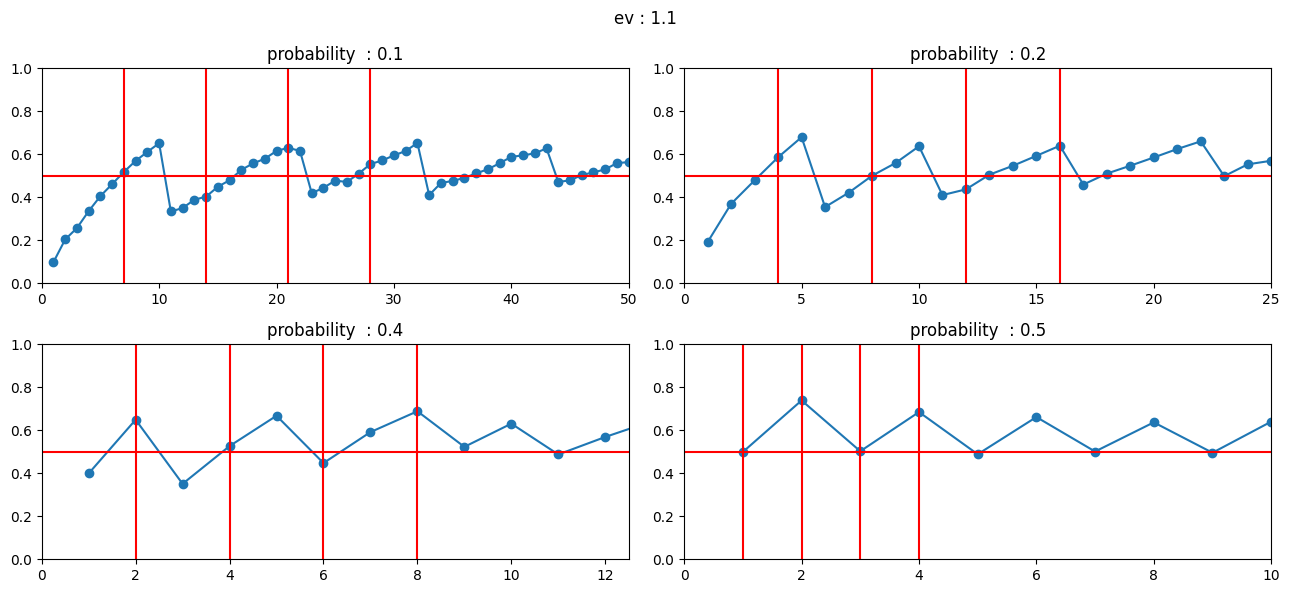

In [8]:
ev = 1.1
plt.figure(figsize=(13, 6))
for idx, p in enumerate([0.1, 0.2, 0.4, 0.5]):
    plt.subplot(2, 2, idx + 1)

    result_dict = dict()
    for n in range(1, 100 + 1):
        tested_samples = do_test(samples=samples, probability=p, ev=ev, n=n)
        result_dict[n] = calc_win_ratio(tested_samples, initial_money)

    plt.title(f"probability  : {p}")
    plt.scatter(result_dict.keys(), result_dict.values())
    plt.plot(result_dict.keys(), result_dict.values())
    plt.ylim([0, 1])
    plt.xlim([0, (1 / p) * 5])
    plt.axhline(0.5, c="r")
    plt.axvline(calc_최소한번성공(p), c="r")
    plt.axvline(calc_최소한번성공(p) * 2, c="r")
    plt.axvline(calc_최소한번성공(p) * 3, c="r")
    plt.axvline(calc_최소한번성공(p) * 4, c="r")
plt.suptitle("ev : 1.1")
plt.tight_layout()
plt.show()

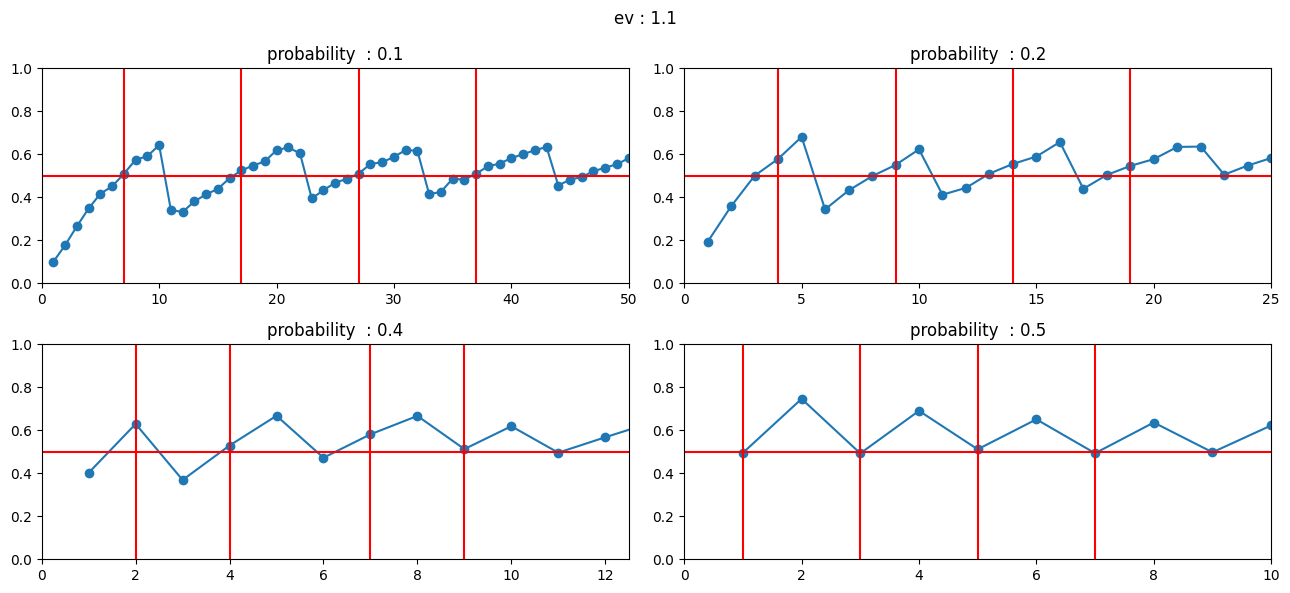

In [9]:
ev = 1.1
plt.figure(figsize=(13, 6))
for idx, p in enumerate([0.1, 0.2, 0.4, 0.5]):
    plt.subplot(2, 2, idx + 1)

    result_dict = dict()
    for n in range(1, 100 + 1):
        tested_samples = do_test(samples=samples, probability=p, ev=ev, n=n)
        result_dict[n] = calc_win_ratio(tested_samples, initial_money)

    plt.title(f"probability  : {p}")
    plt.scatter(result_dict.keys(), result_dict.values())
    plt.plot(result_dict.keys(), result_dict.values())
    plt.ylim([0, 1])
    plt.xlim([0, (1 / p) * 5])
    plt.axhline(0.5, c="r")
    plt.axvline(calc_최소n번성공(p, 1, 0.5), c="r")
    plt.axvline(calc_최소n번성공(p, 2, 0.5), c="r")
    plt.axvline(calc_최소n번성공(p, 3, 0.5), c="r")
    plt.axvline(calc_최소n번성공(p, 4, 0.5), c="r")
plt.suptitle(f"ev : {ev}")
plt.tight_layout()
plt.show()

In [10]:
import math

math.log(0.5) / math.log(0.5)

1.0

In [11]:
calc_최소n번성공(0.5, 1, 0.5)

1